In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/MLDatasets/abalone.csv")

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:

df['Age'] = np.where(df['Rings']>11, 'Old', 'Young')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Young
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Young
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Young


(array([ 960.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3217.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

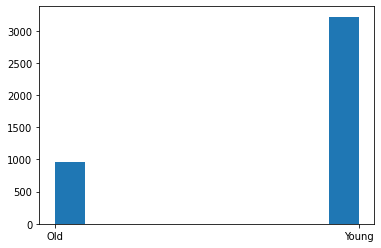

In [ ]:
plt.hist(x=df['Age'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Age']= label_encoder.fit_transform(df['Age'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [ ]:
df_sex=pd.get_dummies(df['Sex'])
df=pd.concat([df,df_sex],axis="columns")
df=df.drop(["Sex"],axis="columns")
df.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df))
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0,1,0


Length


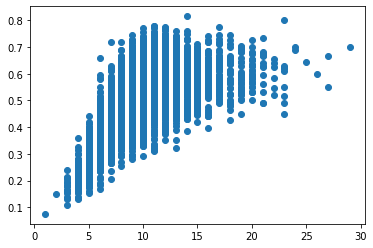

Diameter


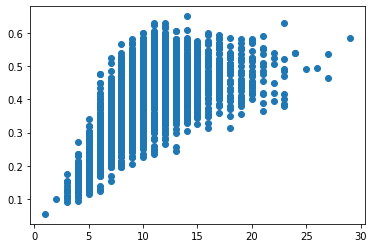

Height


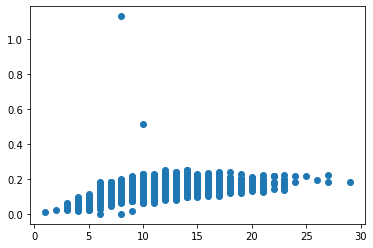

Whole weight


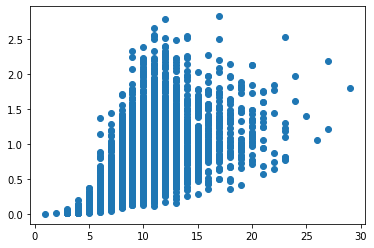

Shucked weight


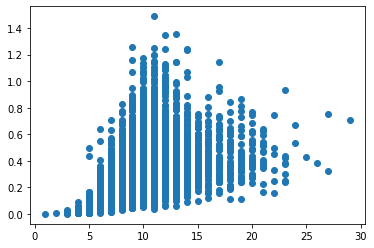

Viscera weight


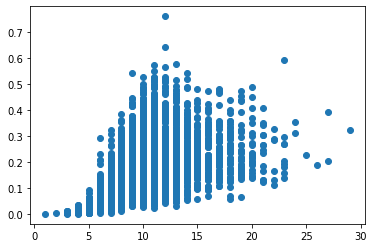

Shell weight


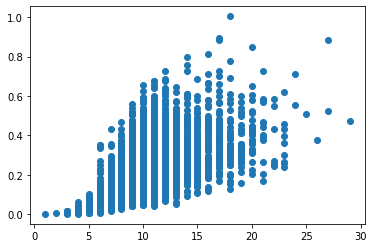

In [ ]:
%matplotlib inline
for i in df.columns:
  if i not in ["Rings","F","I","M","Age"]:
    print(i)
    plt.scatter(df['Rings'],df[i])
    plt.show()


In [ ]:
y=df["Rings"]
X=df.drop(["Rings","F","M","I"],axis="columns")

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000,solver='lbfgs')
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model.score(X_test,y_test)

0.3576555023923445

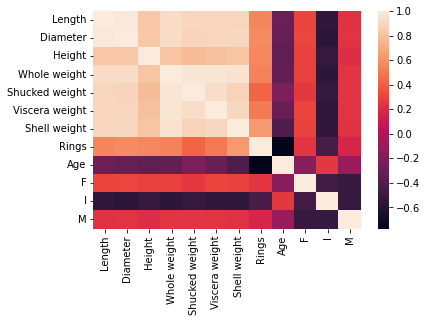

In [ ]:
import seaborn as sns
sns.heatmap(data=df.corr())